##  Import required libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

## Extract Dataset from ZIP File

In [2]:
import zipfile

zip_path = "archive.zip"

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("unzipped_data")
        print("✅ Extraction complete!")
except zipfile.BadZipFile:
    print("❌ Still not a valid zip file according to Python.")


✅ Extraction complete!


### Visualize Some Images

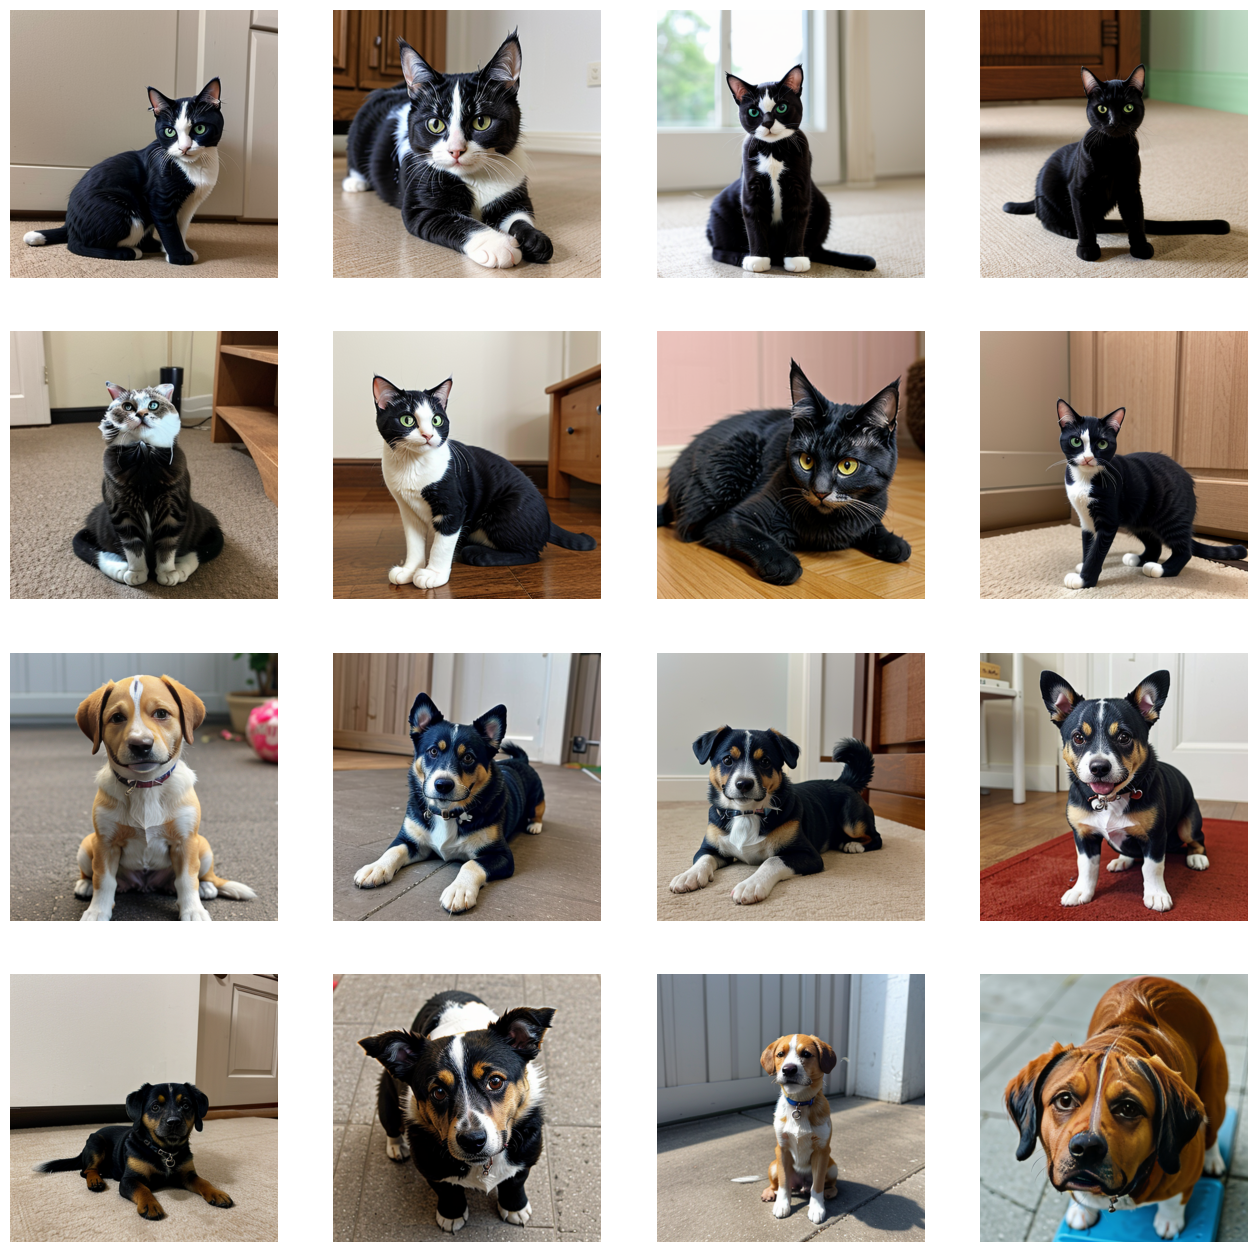

In [3]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/unzipped_data/animals/cat')
dog_dir = os.path.join('/content/unzipped_data/animals/dog')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

### Prepare Data Using ImageDataGenerator



In [4]:
# Use only ImageDataGenerator API for consistency

base_dir = '/content/unzipped_data'

train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 1000 files belonging to 1 classes.
Using 900 files for training.
Found 1000 files belonging to 1 classes.
Using 100 files for validation.


## Build the CNN Model

In [5]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator with rescaling and validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Define the training data generator
train_generator = datagen.flow_from_directory(
    '/content/unzipped_data/animals',   # <-- Make sure this path is correct
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Define the validation data generator (optional but recommended)
val_generator = datagen.flow_from_directory(
    '/content/unzipped_data/animals',
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Print class indices
print(train_generator.class_indices)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
{'cat': 0, 'dog': 1}


In [7]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(200, 200))
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Important: same scaling as training data

    result = model.predict(img)
    print("Raw prediction:", result)

    # If 'cat' = 0 and 'dog' = 1
    if result >= 0.5:
        print("Prediction: Dog 🐶")
    else:
        print("Prediction: Cat 🐱")


## Compile the Model

In [8]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


## Train the Model

In [9]:
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.5580 - loss: 0.8297 - val_accuracy: 1.0000 - val_loss: 1.8123e-04
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.8054 - loss: 0.4435 - val_accuracy: 1.0000 - val_loss: 0.0186
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.9411 - loss: 0.2594 - val_accuracy: 0.8200 - val_loss: 0.3482
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9926 - loss: 0.1413 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.9939 - loss: 0.0852 - val_accuracy: 1.0000 - val_loss: 0.0158
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9988 - loss: 0.0535 - val_accuracy: 1.0000 - val_loss: 0.0211
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 1.0000 - loss: 0.0369 - val_accuracy: 1.0000 - val_loss: 0.0240
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9963 - loss: 0.0262 - val_accuracy: 1.0000 - val_

## Save the Model

In [10]:
model.save("cat_dog_classifier.h5")


## Plot Accuracy and Loss Curves

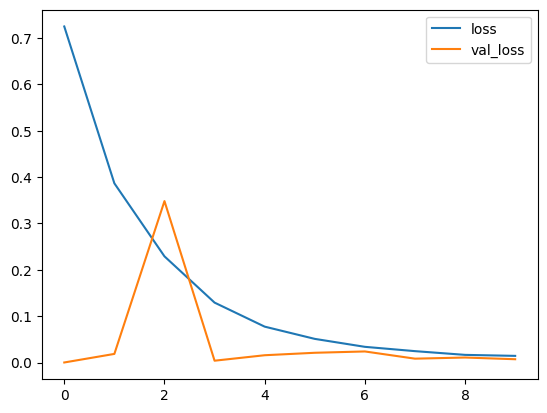

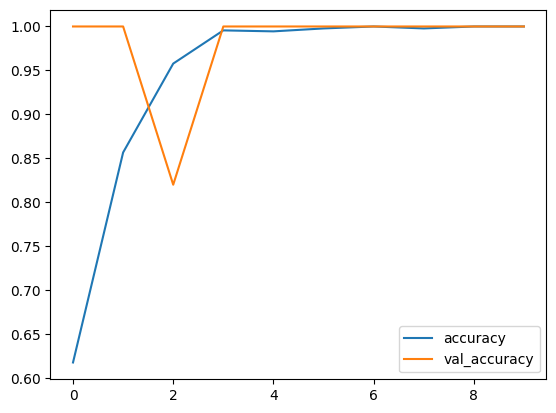

In [11]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [12]:
print(train_generator.class_indices)


{'cat': 0, 'dog': 1}


## Prediction Function

In [13]:

# Print class indices
print(train_generator.class_indices)

print(train_generator.class_indices)

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(200, 200))
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Important: same scaling as training data

    result = model.predict(img)
    print("Raw prediction:", result)

    # If 'cat' = 0 and 'dog' = 1
    if result >= 0.5:
        print("Prediction: Dog 🐶")
    else:
        print("Prediction: Cat 🐱")


{'cat': 0, 'dog': 1}
{'cat': 0, 'dog': 1}


## Test the Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Raw prediction: [[0.00136404]]
Prediction: Cat 🐱


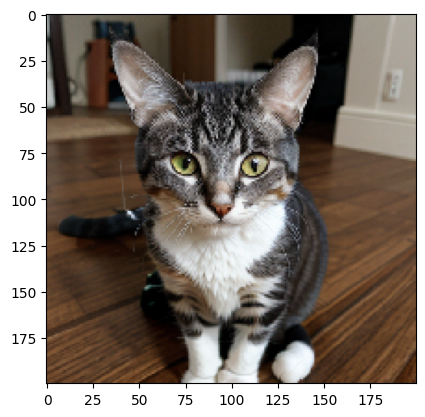

In [16]:
from tensorflow.keras.preprocessing import image

predict_image('/content/unzipped_data/animals/cat/00000-4122619873.png')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Raw prediction: [[0.00136062]]
Prediction: Cat 🐱


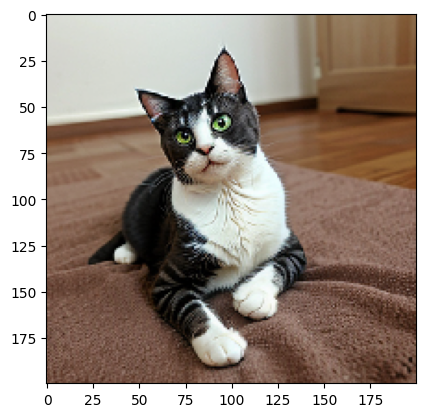

In [17]:
predict_image('/content/unzipped_data/animals/cat/00016-4122619889.png')